In [2]:
#import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, auc, roc_curve, accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [1]:
import pandas as pd 
import numpy as np

In [3]:
#Read the data , data is given in 2 parts : customer order and merchant info
order_Train = pd.read_csv('train_order_data.csv')
merchant_Train = pd.read_csv('train_merchant_data.csv')

In [4]:
#this is target column and this problem is supervised binary classification
Target = pd.read_csv('train.csv')
Target.head()

,Merchant_ID,Fraudster
0,221592,0
1,316935,1
2,38454,1
3,214437,1
4,296240,1


In [ ]:
#prileminary look at data

In [6]:
print(order_Train.shape)
print(merchant_Train.shape)

(54213, 7)
(54213, 7)


In [7]:
order_Train.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146


In [ ]:
#Extract year and month features from data as this can be useful

In [5]:
order_Train['year'] = pd.DatetimeIndex(order_Train['Date_of_Order']).year

In [6]:
order_Train['month'] = pd.DatetimeIndex(order_Train['Date_of_Order']).month

In [7]:
order_Train

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,year,month
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,2018,4
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,2018,6
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,2018,10
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,2018,12
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,2018,9
5,156106,f1e5595ef446,2018-05-13 08:20:42,100,Direct,Internet Banking,134043,2018,5
6,146054,96d864107383,2018-03-30 02:47:44,65,SEO,Credit Card,199582,2018,3
7,130966,c26e79192d46,2018-08-28 16:48:35,140,SEO,E-wallet,42529,2018,8
8,139404,4bbf3902918f,2018-09-19 08:29:24,100,SEO,Debit Card,370985,2018,9
9,128964,8551ac9908b4,2018-01-06 15:16:03,45,Direct,Credit Card,113335,2018,1


In [15]:
order_Train.describe()

,Customer_ID,Order_Value_USD,Merchant_ID,year,month
count,54213.000000,54213.000000,54213.000000,54213.0,54213.000000
mean,137966.285208,92.230240,200395.176212,2018.0,6.074982
std,15563.516156,45.673263,115398.486895,0.0,2.661109
min,111234.000000,22.000000,2.000000,2018.0,1.000000
25%,124471.000000,55.000000,100997.000000,2018.0,4.000000
50%,137864.000000,88.000000,200574.000000,2018.0,6.000000
75%,151405.000000,122.000000,300407.000000,2018.0,8.000000
max,165000.000000,385.000000,399993.000000,2018.0,12.000000


In [16]:
order_Train.isnull().sum()
#no missing values

Customer_ID             0
Order_ID                0
Date_of_Order           0
Order_Value_USD         0
Order_Source            0
Order_Payment_Method    0
Merchant_ID             0
year                    0
month                   0
dtype: int64

In [17]:
merchant_Train.isnull().sum()

Ecommerce_Provider_ID         0
Merchant_ID                   0
Merchant_Registration_Date    0
Registered_Device_ID          0
Gender                        0
Age                           0
IP_Address                    0
dtype: int64

In [8]:
Union = pd.merge(order_Train,merchant_Train,on='Merchant_ID')
#Merging data on merchant id which is same column

In [19]:
Union.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,year,month,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,2018,4,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,2018,6,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,2018,10,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,2018,12,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,2018,9,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153


In [9]:
Union['merchant_year'] = pd.DatetimeIndex(Union['Merchant_Registration_Date']).year
Union['merchant_month'] = pd.DatetimeIndex(Union['Merchant_Registration_Date']).month
#yet again creating new features from date registration as fradsters may depend on it

In [10]:
Union.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,year,month,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,merchant_year,merchant_month
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,2018,4,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,2018,4
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,2018,6,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,2018,5
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,2018,10,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,2018,8
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,2018,12,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,2018,8
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,2018,9,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,2018,5


In [11]:
Union = pd.merge(Union,Target,on='Merchant_ID')
#yet again merging

In [12]:
Union.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,year,month,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,merchant_year,merchant_month,Fraudster
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,2018,4,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,2018,4,0
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,2018,6,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,2018,5,0
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,2018,10,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,2018,8,1
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,2018,12,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,2018,8,0
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,2018,9,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,2018,5,0


In [13]:
Union.drop(['Customer_ID'],axis=1,inplace=True)
#dropping unecessary columns

In [14]:
Union.drop(['Order_ID'],axis=1,inplace=True)
Union.drop(['Date_of_Order'],axis=1,inplace=True)
Union.drop(['Merchant_ID'],axis=1,inplace=True)
Union.drop(['year'],axis=1,inplace=True)
Union.drop(['merchant_year'],axis=1,inplace=True)#as whole column is of only 1 year , its not useful in predicting 
Union.drop(['IP_Address'],axis=1,inplace=True)

In [15]:
Union.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,month,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,merchant_month,Fraudster
0,148,Direct,Credit Card,4,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,4,0
1,145,SEO,Credit Card,6,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,5,0
2,62,Ads,Internet Banking,10,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,8,1
3,28,SEO,Debit Card,12,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,8,0
4,70,Ads,Credit Card,9,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,5,0


In [16]:

Union.drop(['Ecommerce_Provider_ID'],axis=1,inplace=True)
Union.drop(['Merchant_Registration_Date'],axis=1,inplace=True)
Union.drop(['Registered_Device_ID'],axis=1,inplace=True)
#dropping all IDs

KeyError: "labels ['merchant_year'] not contained in axis"

In [17]:
Union.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,month,Gender,Age,merchant_month,Fraudster
0,148,Direct,Credit Card,4,M,30,4,0
1,145,SEO,Credit Card,6,F,20,5,0
2,62,Ads,Internet Banking,10,F,46,8,1
3,28,SEO,Debit Card,12,M,37,8,0
4,70,Ads,Credit Card,9,F,26,5,0


In [207]:
sns.catplot(x=Union['Gender'],y=Union['Fraudster'].value_counts(),data=Union)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [18]:
for col in ['Order_Source','Order_Payment_Method','month','Gender','merchant_month','Fraudster']:
    Union[col]=Union[col].astype('category')
    #categorical conversions as we want to dummify them

In [19]:
cat =  Union.select_dtypes(include=['category']).columns

In [20]:
target = 'Fraudster'
cat = cat[cat!=target]
cat
#dummifying except target column

Index(['Order_Source', 'Order_Payment_Method', 'month', 'Gender',
       'merchant_month'],
      dtype='object')

In [21]:
data = pd.get_dummies(Union, prefix=cat, prefix_sep='_', columns=cat)
#dummify

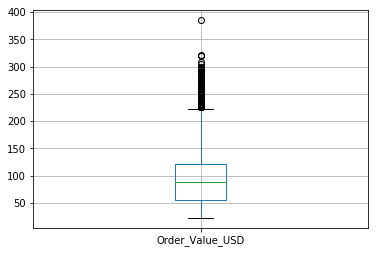

In [196]:
data.boxplot(column=['Order_Value_USD'])
#we cant drop outliers since the values are not impossibles

Text(0,0.5,'Age')

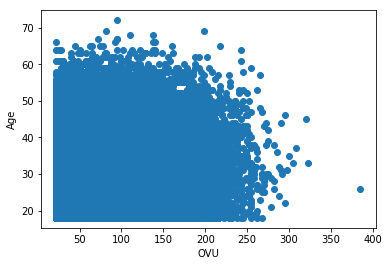

In [199]:
plt.scatter(data['Order_Value_USD'],data['Age'])
plt.xlabel('OVU')
plt.ylabel('Age')

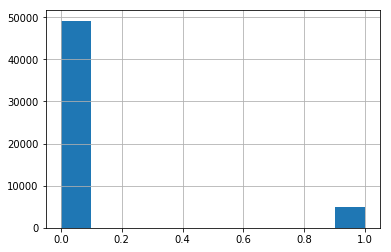

In [194]:
data['Fraudster'].hist()
#very low '1s'

In [22]:
data.dtypes

Order_Value_USD                             int64
Age                                         int64
Fraudster                                category
Order_Source_Ads                            uint8
Order_Source_Direct                         uint8
Order_Source_SEO                            uint8
Order_Payment_Method_Cash On Delivery       uint8
Order_Payment_Method_Credit Card            uint8
Order_Payment_Method_Debit Card             uint8
Order_Payment_Method_E-wallet               uint8
Order_Payment_Method_Internet Banking       uint8
month_1                                     uint8
month_2                                     uint8
month_3                                     uint8
month_4                                     uint8
month_5                                     uint8
month_6                                     uint8
month_7                                     uint8
month_8                                     uint8
month_9                                     uint8


In [23]:
train,test = train_test_split(data,test_size=0.25,stratify=data['Fraudster'])
#splitting train test by 75%-25%

In [24]:
train.shape

(40659, 33)

In [25]:
test.shape

(13554, 33)

In [26]:
data.shape

(54213, 33)

In [27]:
train.head()

,Order_Value_USD,Age,Fraudster,Order_Source_Ads,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Cash On Delivery,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,...,Gender_F,Gender_M,merchant_month_1,merchant_month_2,merchant_month_3,merchant_month_4,merchant_month_5,merchant_month_6,merchant_month_7,merchant_month_8
18845,75,24,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
19274,172,44,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
32840,55,36,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3742,85,54,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
17505,122,31,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [28]:
X_train = train.iloc[:,([0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])]
X_test = test.iloc[:,([0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])]
Y_train = train.iloc[:,[2]]
Y_test = test.iloc[:,[2]]
#Seperating Xtrain,Xtest,Y_train,Y_test

In [29]:
Y_train.shape

(40659, 1)

In [30]:
Y_test

,Fraudster
26648,0
46038,0
18510,0
27788,0
34337,1
52447,0
52416,0
50550,0
36747,0
2139,0


In [31]:
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,([0,1])])

X_train.iloc[:,([0,1])] = scaler.transform(X_train.iloc[:,([0,1])])
X_test.iloc[:,([0,1])] = scaler.transform(X_test.iloc[:,([0,1])])
#Scaling is extremely necessary since we need to standardize data . But for Gradient boosting and logistic regression its not needed but there is no harm in scaling

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
#Using Random forest Classifier . RVC is most dependant algorith and almost works on any dataset . It doesnt suffer from curse of dimensionality and is an upgradtion on decision tree

In [32]:
param_grid = {"n_estimators" : [50, 60],#no of DT you want to build and vote
              "max_depth" : [5,8],
              "max_features" : [3, 5],#max no of features RVF is allowed to take
              "min_samples_leaf" : [4, 6, 8]}#leaf is end node of DT
#giving parameters based on intuition

In [33]:
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, cv=3)#searching best model among above parameters
clf.fit(X_train, Y_train)

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_va

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_va

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_va

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [34]:
clf.best_params_
#getting best params

{'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 50}

In [136]:
clf = RandomForestClassifier(max_features='sqrt',max_depth=20,  n_estimators=200,class_weight = {0:0.2,1:0.8},min_samples_leaf= 25)
#adding class weight to target column is very imp as there are large no of '0' and small no of '1'.without this , we could get largely skewed result

In [137]:
clf.fit(X_train, Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=25,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [138]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [139]:
from sklearn.metrics import f1_score

In [140]:
f1_score(Y_test, test_pred)
#f1 score is weighted average of precision and recall. f1 score is better than accuracy

0.6304347826086957

In [141]:
accuracy_score(Y_test,test_pred)

0.9423048546554522

In [142]:
accuracy_score(Y_train,train_pred)

0.9438992596965001

In [ ]:
#Gradient boosting is another method of Ml

In [66]:
gbm = GradientBoostingClassifier()

In [68]:
gbm.fit(X_train,Y_train)

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
train_pred_gbm = gbm.predict(X_train)
test_pred_gbm = gbm.predict(X_test)

In [70]:
f1_score(Y_test, test_pred)

0.6304347826086957

In [183]:
base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=20,class_weight = {0:0.1,1:0.9})
ada = AdaBoostClassifier(learning_rate=1,n_estimators=150,base_estimator = base_estimator)

In [155]:
ada_param_grid = {'n_estimators': [100], 'learning_rate':[1]}
ada_grid = GridSearchCV(ada, param_grid=ada_param_grid, cv=2)
ada_grid.fit(X_train,Y_train)

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=10,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [185]:
ada.fit(X_train,Y_train)

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.1,
                                                                       1: 0.9},
                                                         criterion='gini',
                                                         max_depth=20,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                     

In [186]:
adatrain_pred = ada.predict(X_train)
adatest_pred= ada.predict(X_test)

In [187]:
f1_score(Y_test,adatest_pred)

0.6084142394822006

In [ ]:
#preprocessing unseen data, all steps are same.

In [46]:
unseen_merchant = pd.read_csv('test_merchant_data.csv')
unseen_order = pd.read_csv('test_order_data.csv')
unseen_predictions = pd.read_csv('test.csv')

In [47]:
unseen_order['year'] = pd.DatetimeIndex(unseen_order['Date_of_Order']).year
unseen_order['month'] = pd.DatetimeIndex(unseen_order['Date_of_Order']).month

In [48]:
Union1 = pd.merge(unseen_order,unseen_merchant,on='Merchant_ID')

In [49]:
Union1['merchant_year'] = pd.DatetimeIndex(Union1['Merchant_Registration_Date']).year
Union1['merchant_month'] = pd.DatetimeIndex(Union1['Merchant_Registration_Date']).month

In [50]:
Union1.drop(['Customer_ID'],axis=1,inplace=True)
Union1.drop(['Order_ID'],axis=1,inplace=True)
Union1.drop(['Date_of_Order'],axis=1,inplace=True)
Union1.drop(['Merchant_ID'],axis=1,inplace=True)
Union1.drop(['year'],axis=1,inplace=True)
Union1.drop(['merchant_year'],axis=1,inplace=True)
Union1.drop(['IP_Address'],axis=1,inplace=True)

In [51]:
Union1.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,month,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,merchant_month
0,60,SEO,Credit Card,3,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,2
1,28,SEO,Credit Card,6,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,4
2,75,Ads,Debit Card,4,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,1
3,98,SEO,Credit Card,4,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,2
4,35,SEO,Credit Card,5,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,5


In [52]:
Union1.drop(['Registered_Device_ID'],axis=1,inplace=True)
Union1.drop(['Ecommerce_Provider_ID'],axis=1,inplace=True)
Union1.drop(['Merchant_Registration_Date'],axis=1,inplace=True)

In [53]:
Union1.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,month,Gender,Age,merchant_month
0,60,SEO,Credit Card,3,F,40,2
1,28,SEO,Credit Card,6,M,39,4
2,75,Ads,Debit Card,4,M,23,1
3,98,SEO,Credit Card,4,M,34,2
4,35,SEO,Credit Card,5,M,20,5


In [54]:
for col in ['Order_Source','Order_Payment_Method','month','Gender','merchant_month']:
    Union1[col]=Union1[col].astype('category')

In [55]:
cat =  Union1.select_dtypes(include=['category']).columns

In [188]:
data1 = pd.get_dummies(Union1, prefix=cat, prefix_sep='_', columns=cat)

In [189]:
data1.head()

,Order_Value_USD,Age,Order_Source_Ads,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Cash On Delivery,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,...,Gender_F,Gender_M,merchant_month_1,merchant_month_2,merchant_month_3,merchant_month_4,merchant_month_5,merchant_month_6,merchant_month_7,merchant_month_8
0,60,40,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,28,39,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,75,23,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
3,98,34,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,35,20,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [190]:
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,([0,1])])

data1.iloc[:,([0,1])] = scaler.transform(data1.iloc[:,([0,1])])

In [191]:
adaUnseen_Test_pred = ada.predict(data1)

In [192]:
data1['Unseen_Test_pred']=adaUnseen_Test_pred

In [193]:
data1['Unseen_Test_pred'].value_counts()

0    13185
1      369
Name: Unseen_Test_pred, dtype: int64

In [62]:
unseen_predictions['predictions'] = Unseen_Test_pred

In [63]:
unseen_predictions.head()

,Merchant_ID,predictions
0,53637,0
1,243517,0
2,343640,0
3,69889,0
4,125706,0


In [65]:
unseen_predictions.to_csv('E:\\insofe\\mith\\MiTH_Data\\Data_For_all\\Test21.csv')

In [75]:
unseen_gbm_pred = gbm.predict(data1)

In [77]:
unseen_predictions['Fraudsters'] =unseen_gbm_pred 

In [78]:
unseen_predictions['Fraudsters'].value_counts()

0    12771
1      783
Name: Fraudsters, dtype: int64

In [79]:
unseen_predictions.to_csv('E:\\insofe\\mith\\MiTH_Data\\Data_For_all\\gbm_Rvf.csv')